In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import string

Dodawanie populacji krajów do zbioru danych

In [3]:
populacja = "11,52	6,95	10,7	5,82	83,17	1,33	4,96	10,72	47,33	67,29	4,06	59,64	0,89	1,91	2,79	0,63	9,77	0,51	17,41	8,9	37,96	10,3	19,33	2,1	5,46	5,53	10,33	0,36	5,37"
populacja = populacja.replace(",",".")
populacja = populacja.split()
pop = []
for i in populacja:
  pop.append(float(i))


Wczytywanie watości mierników i zmiana nazw kolumn

In [6]:
dane_raw = pd.read_excel("dane_raw.xlsx")

dane_raw = dane_raw.rename(columns={'Unnamed: 0':'Kraj', 'healthylifeears':'healthy_life_years'})
populacja = pd.DataFrame()
populacja["Kraj"] = dane_raw["Kraj"]
populacja["Populacja_kraju[mln]"] = pop
populacja['Kraj'] = populacja['Kraj'].replace(['Belgium','Bulgaria','Czechia',
                                               'Denmark','Germany','Estonia',
                                               'Ireland','Greece','Spain',
                                               'France','Croatia','Italy',
                                               'Cyprus','Latvia','Lithuania','Luxemburg','Hungary','Malta',
                                               'Netherlands','Austria','Poland','Portugal','Romania','Slovenia',
                                               'Slovakia','Finland','Sweden','Iceland','Norway'],
                                              ['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia',])
dane_raw['Kraj'] = dane_raw['Kraj'].replace(['Belgium','Bulgaria','Czechia',
                                               'Denmark','Germany','Estonia',
                                               'Ireland','Greece','Spain',
                                               'France','Croatia','Italy',
                                               'Cyprus','Latvia','Lithuania','Luxemburg','Hungary','Malta',
                                               'Netherlands','Austria','Poland','Portugal','Romania','Slovenia',
                                               'Slovakia','Finland','Sweden','Iceland','Norway'],
                                              ['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia',])

dane_raw = dane_raw.rename(columns={'Unnamed: 0':'kraj', 'healthy_life_years':'zdrowe lata','wydatkinasluzbezdrowai':'wydatki na slużbę zdrowia','alcoholdrinkers':'pijący',
'brakporcjiwarzywiowocow':'nie jedzący owoców i warzyw','palacy':'palący','sportysilowe':'uprawiający sporty siłowe','aerobic':'uprawiający aerobik','opieka':'liczba lóżek w szpitalach',
'Otyli':'liczba osób otyłych','pobytnaimpreziesportowejprzezrok+16':'biorący udział w imprezach sportowych','wydatkinasportowewydarzenia':'wydatki na sportowe wydarzenia',
'nationalexpeditureonprotectioneviroment':'wydatki na ochronę środowiska','emisjadwutelenkuwegla':'emisja dwutlanku węgla','indexcenymieszkan2015=100':'indeks cen mieszkań',
'hicp(averageindexandrateofchange':'indeks zmian cen towarów','vaccinations':'zaszczepieni','niedociazeni':'liczba osób z niedowagą',
'studencizapisaninaosobywwieku20-24':'liczba studentów','nauczycieleorazpersonelakademicki':'personel akademicki','publicznewydatkinaedukacje':'wydatki na edukację',
'absolwenciszkolwyzszych':'absolwenci szkół wyższych','malozarabiajacyhcdowszystkich':'osoby mało zarabiające','weeklyhoursforemplyed':'czas pracy',
'fatalaccindentsatwork':'śmiertelne wypadki w pracy','stopabezrobocia':'bezrobocie','satisfactionjob':'praca','theft':'kradzieże',
'assault':'napaści','overcrowdingrate':'zatłoczenie','policeofficers':'policjanci','pobytnakulturowychaktywnosciachprzynajmniejrazwroku16+':'biorący udział w imprezach kulturowych',
'wydatkinaculturowewydarzenia':'wydatki na wydarzenia kulturowe'})

Obliczenie statystyk potrzebnych do pogrupowania krajów

In [8]:
dan = dane_raw.describe()
dan.drop(["count"], axis=0, inplace=True)
dan.drop(["25%"], axis=0, inplace=True)
dan.drop(["50%"], axis=0, inplace=True)
dan.drop(["75%"], axis=0, inplace=True)
print(dan)

      TOPSIS+wagi    TOPSIS  Bezwzorcowy  Bezwzorcowy z wagami  \
mean     0.306180  0.273254     0.360865              0.387219   
std      0.083475  0.068042     0.080916              0.089503   
min      0.192761  0.162796     0.210252              0.227508   
max      0.539719  0.441208     0.508467              0.575216   

      Wzorcowy Hellwiga  
mean           0.129602  
std            0.064801  
min           -0.011361  
max            0.248481  


Przegląd populacji krajów

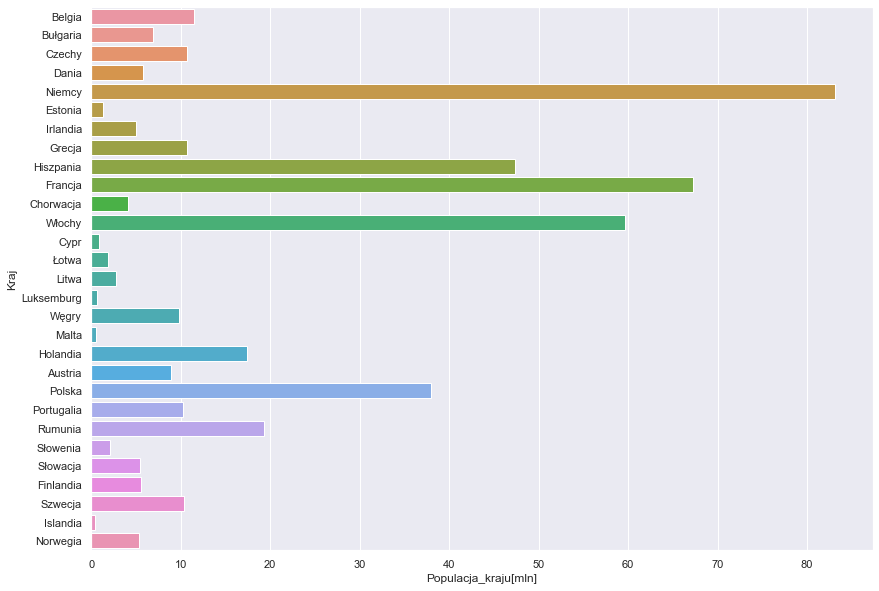

In [11]:
sns.set(rc={'figure.figsize':(14,10)})
sns_plot = sns.barplot(y="Kraj", x="Populacja_kraju[mln]", data=populacja);
sns_plot.figure.savefig("output.png")


Tworzenie wykresu rankingu stworzonego na podstawie miernika bezwzorcowego bez wag

In [13]:
dane = pd.DataFrame()
dane["Kraj"] = dane_raw["Kraj"]
dane["Bezwzorcowy_bez_wag"] = dane_raw["Bezwzorcowy"]

Tworzenie wykresu rankingu stworzonego na podstawie miernika TOPSIS z wagami

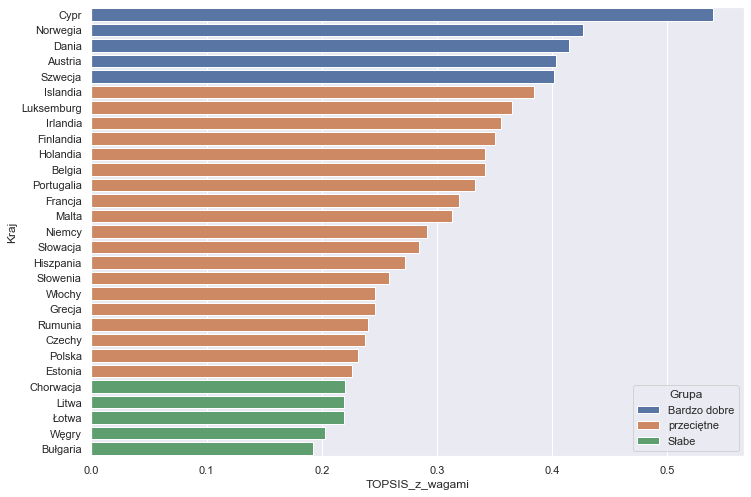

In [14]:

wykres = pd.DataFrame()
wykres["Kraj"] = dane_raw["Kraj"]
wykres["TOPSIS_z_wagami"] = dane_raw["TOPSIS+wagi"]
wykres["Grupa"] = wykres["TOPSIS_z_wagami"]

def format_t(x):
  if x>0.389655:
    return "Bardzo dobre"
  if x<0.22270500000000001:
    return "Słabe"
  else:
    return "przeciętne"
wykres['Grupa'] = wykres['Grupa'].apply(lambda x: format_t(x))

wykres.sort_values(by=["TOPSIS_z_wagami"], inplace=True, ascending=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y="Kraj", x="TOPSIS_z_wagami", hue="Grupa",dodge=False,data=wykres);

Tworzenie wykresu rankingu stworzonego na podstawie miernika TOPSIS bez wag

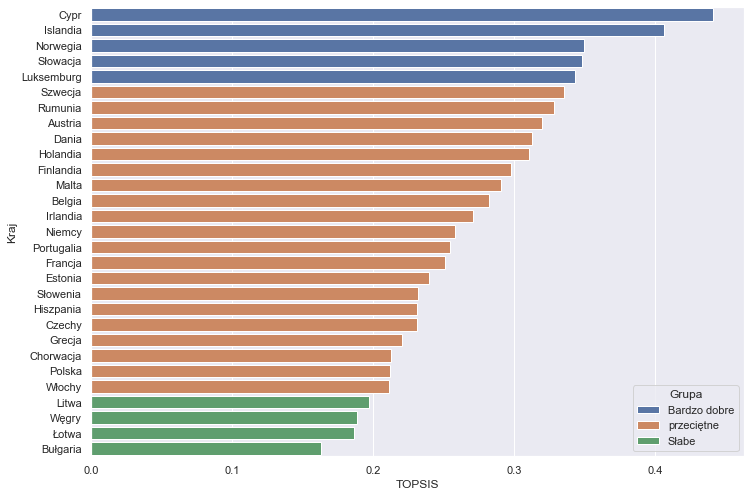

In [15]:
wykres = pd.DataFrame()
wykres["Kraj"] = dane_raw["Kraj"]
wykres["TOPSIS"] = dane_raw["TOPSIS"]
wykres["Grupa"] = wykres["TOPSIS"]

def format_t(x):
  if x>0.341296:
    return "Bardzo dobre"
  if x<0.205212:
    return "Słabe"
  else:
    return "przeciętne"
wykres['Grupa'] = wykres['Grupa'].apply(lambda x: format_t(x))

wykres.sort_values(by=["TOPSIS"], inplace=True, ascending=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y="Kraj", x="TOPSIS", hue="Grupa",dodge=False,data=wykres);

Tworzenie wykresu rankingu stworzonego na podstawie miernika bezwzorcowego bez wag

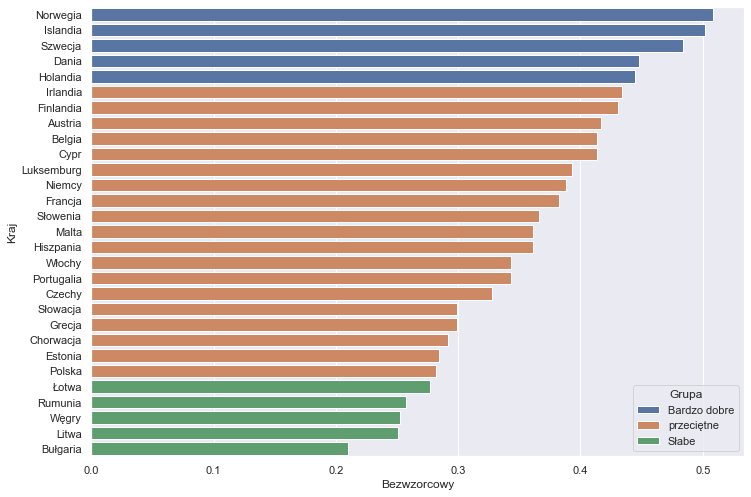

In [16]:
wykres = pd.DataFrame()
wykres["Kraj"] = dane_raw["Kraj"]
wykres["Bezwzorcowy"] = dane_raw["Bezwzorcowy"]
wykres["Grupa"] = wykres["Bezwzorcowy"]

def format_t(x):
  if x>0.441781:
    return "Bardzo dobre"
  if x<0.279949:
    return "Słabe"
  else:
    return "przeciętne"
wykres['Grupa'] = wykres['Grupa'].apply(lambda x: format_t(x))

wykres.sort_values(by=["Bezwzorcowy"], inplace=True, ascending=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y="Kraj", x="Bezwzorcowy", hue="Grupa",dodge=False,data=wykres);

Tworzenie wykresu rankingu stworzonego na podstawie miernika bezwzorcowego z wagami

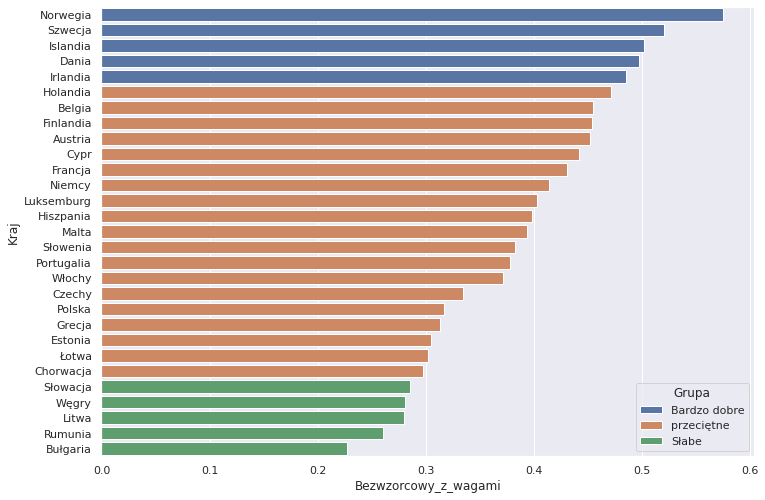

In [15]:
wykres = pd.DataFrame()
wykres["Kraj"] = dane_raw["Kraj"]
wykres["Bezwzorcowy_z_wagami"] = dane_raw["Bezwzorcowy z wagami"]
wykres["Grupa"] = wykres["Bezwzorcowy_z_wagami"]

def format_t(x):
  if x>0.476722:
    return "Bardzo dobre"
  if x<0.297716:
    return "Słabe"
  else:
    return "przeciętne"
wykres['Grupa'] = wykres['Grupa'].apply(lambda x: format_t(x))

wykres.sort_values(by=["Bezwzorcowy_z_wagami"], inplace=True, ascending=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y="Kraj", x="Bezwzorcowy_z_wagami", hue="Grupa",dodge=False,data=wykres);

Tworzenie wykresu rankingu stworzonego na podstawie miernika wzorocwego Hellwiga

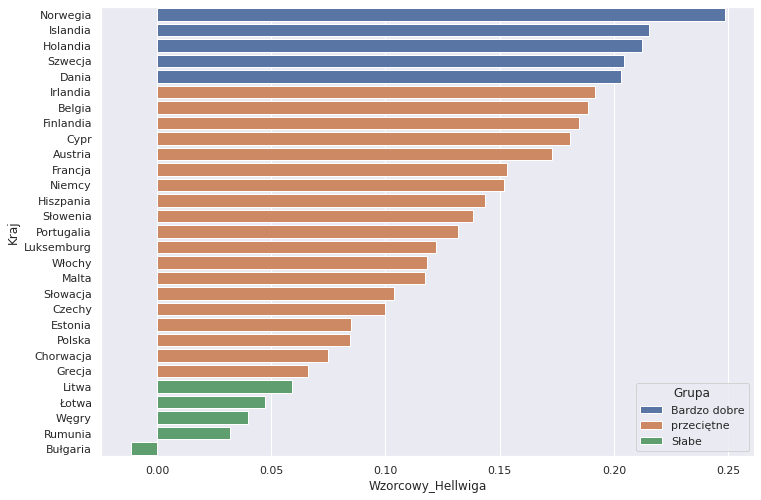

In [16]:
wykres = pd.DataFrame()
wykres["Kraj"] = dane_raw["Kraj"]
wykres["Wzorcowy_Hellwiga"] = dane_raw["Wzorcowy Hellwiga"]
wykres["Grupa"] = wykres["Wzorcowy_Hellwiga"]

def format_t(x):
  if x>0.194403:
    return "Bardzo dobre"
  if x<0.064801:
    return "Słabe"
  else:
    return "przeciętne"
wykres['Grupa'] = wykres['Grupa'].apply(lambda x: format_t(x))

wykres.sort_values(by=["Wzorcowy_Hellwiga"], inplace=True, ascending=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y="Kraj", x="Wzorcowy_Hellwiga", hue="Grupa",dodge=False,data=wykres);

# Clustering

In [20]:
df_r = pd.read_excel("C:\\Users\\kpetu\\OneDrive\\Pulpit\\jupyter\\d1.xlsx")
df_r = df_r.rename(columns={'Unnamed: 0':'kraj', 'healthylifeears':'zdrowe lata','wydatkinasluzbezdrowai':'wydatki na slużbę zdrowia','alcoholdrinkers':'pijący',
'brakporcjiwarzywiowocow':'niejedzący owoców i warzyw','palacy':'palący','sportysilowe':'uprawiający sporty siłowe','aerobic':'uprawiający aerobik','opieka':'liczba lóżek w szpitalach',
'Otyli':'liczba osób otyłych','pobytnaimpreziesportowejprzezrok+16':'biorący udział w imprezach sportowych','wydatkinasportowewydarzenia':'wydatki na sportowe wydarzenia',
'nationalexpeditureonprotectioneviroment':'wydatki na ochronę środowiska','emisjadwutelenkuwegla':'emisja dwutlanku węgla','indexcenymieszkan2015=100':'indeks cen mieszkań',
'hicp(averageindexandrateofchange':'indeks zmian cen towarów','vaccinations':'zaszczepieni','niedociazeni':'liczba osób z niedowagą',
'studencizapisaninaosobywwieku20-24':'liczba studentów','nauczycieleorazpersonelakademicki':'personel akademicki','publicznewydatkinaedukacje':'wydatki na edukację',
'absolwenciszkolwyzszych':'absolwenci szkół wyższych','malozarabiajacyhcdowszystkich':'osoby mało zarabiające','weeklyhoursforemplyed':'czas pracy',
'fatalaccindentsatwork':'śmiertelne wypadki w pracy','stopabezrobocia':'bezrobocie','satisfactionjob':'praca','theft':'kradzieże',
'assault':'napaści','overcrowdingrate':'zatłoczenie','policeofficers':'policjanci','pobytnakulturowychaktywnosciachprzynajmniejrazwroku16+':'biorący udział w imprezach kulturowych',
'wydatkinaculturowewydarzenia':'wydatki na wydarzenia kulturowe'})
print(df_r.columns)

Index(['kraj', 'zdrowe lata', 'wydatki na slużbę zdrowia', 'pijący',
       'niejedzący owoców i warzyw', 'palący', 'uprawiający sporty siłowe',
       'uprawiający aerobik', 'liczba lóżek w szpitalach',
       'liczba osób otyłych', 'liczba osób z niedowagą', 'liczba studentów',
       'personel akademicki', 'wydatki na edukację',
       'absolwenci szkół wyższych', 'osoby mało zarabiające', 'czas pracy',
       'śmiertelne wypadki w pracy', 'bezrobocie', 'praca', 'kradzieże',
       'napaści', 'zatłoczenie', 'policjanci',
       'biorący udział w imprezach kulturowych',
       'wydatki na wydarzenia kulturowe',
       'biorący udział w imprezach sportowych',
       'wydatki na sportowe wydarzenia', 'imigracja', 'emigracja',
       'wydatki na ochronę środowiska', 'emisja dwutlanku węgla',
       'indeks cen mieszkań', 'indeks zmian cen towarów', 'zaszczepieni',
       'test'],
      dtype='object')


In [21]:
df_r['kraj'] = df_r['kraj'].replace(['Belgium','Bulgaria','Czechia',
                                               'Denmark','Germany','Estonia',
                                               'Ireland','Greece','Spain',
                                               'France','Croatia','Italy',
                                               'Cyprus','Latvia','Lithuania','Luxemburg','Hungary','Malta',
                                               'Netherlands','Austria','Poland','Portugal','Romania','Slovenia',
                                               'Slovakia','Finland','Sweden','Iceland','Norway'],
                                              ['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia',])

In [22]:
df = df_r.iloc[:, 1:35].values

# Analiza skupień metodami hierarchicznymi

In [31]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

### Tworzenie dendogramów dla różnych metod łączenia skupień i dla różnych metryk odległości

Dendogram dla metody Warda (metoda łączenia skupień) dla metryki euklidesowej

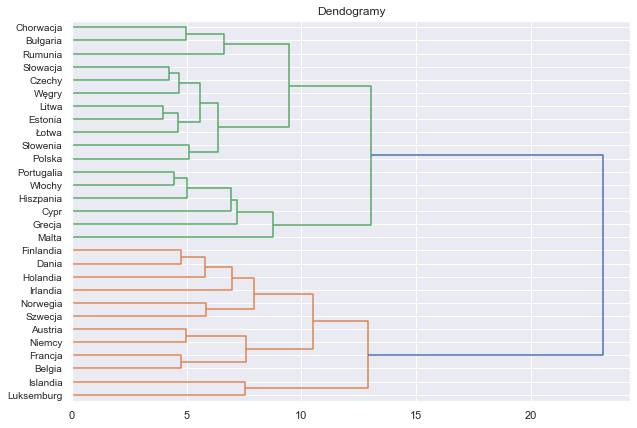

In [23]:
plt.figure(figsize=(10, 7))
plt.title("Dendogramy")
dend = shc.dendrogram(shc.linkage(df, method='ward',metric='euclidean'),orientation='right',labels=['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia',])

Dendogramy metody średnich połączeń dla różnych metryk

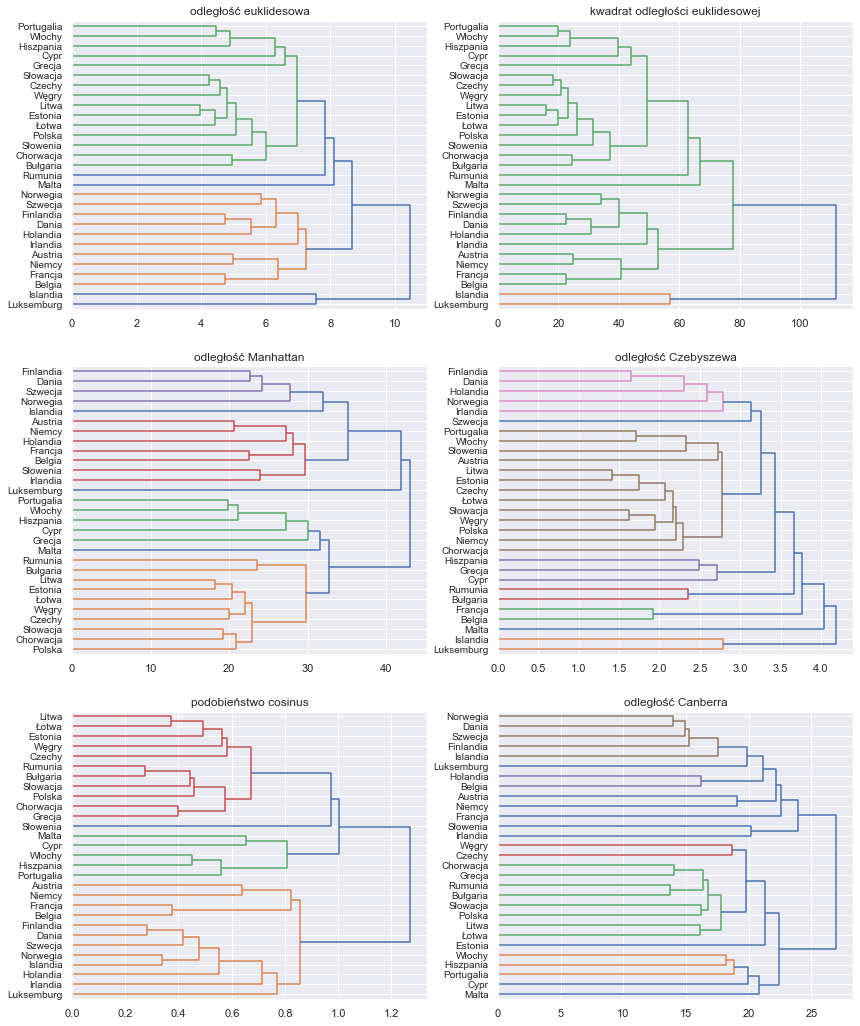

In [25]:

fig, axes = plt.subplots(3, 2, figsize=(14, 18))
dend1 = shc.dendrogram(shc.linkage(df, method='average',metric='euclidean'),ax=axes[0,0],orientation='right',labels=['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia',])
dend2 = shc.dendrogram(shc.linkage(df, method='average',metric='sqeuclidean'),ax=axes[0,1], orientation='right',labels=['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia',])
dend3 = shc.dendrogram(shc.linkage(df, method='average',metric='cityblock'),ax=axes[1,0], orientation='right',labels=['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia',])
dend4 = shc.dendrogram(shc.linkage(df, method='average',metric='chebyshev'),ax=axes[1,1], orientation='right',labels=['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia',])
dend5 = shc.dendrogram(shc.linkage(df, method='average',metric='cosine'),ax=axes[2,0], orientation='right',labels=['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia',])
dend6 = shc.dendrogram(shc.linkage(df, method='average',metric='canberra'),ax=axes[2,1], orientation='right',labels=['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia',])
axes[0, 0].set_title('odległość euklidesowa')
axes[0, 1].set_title('kwadrat odległości euklidesowej')
axes[1, 0].set_title('odległość Manhattan')
axes[1, 1].set_title('odległość Czebyszewa')
axes[2, 0].set_title('podobieństwo cosinus')
axes[2, 1].set_title('odległość Canberra')
plt.show()

Dendogramy metody pojedynczego wiązania dla różnych metryk

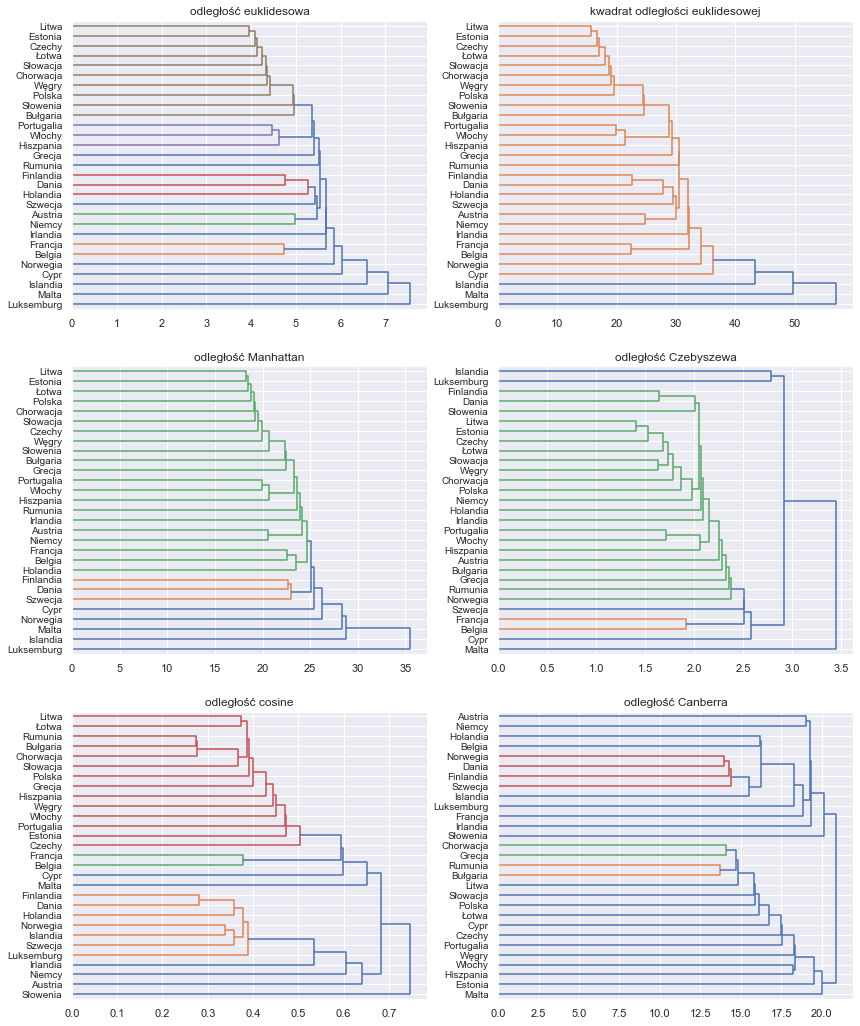

In [27]:
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
dend1 = shc.dendrogram(shc.linkage(df, method='single',metric='euclidean'),ax=axes[0,0],orientation='right',labels=['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia',])
dend2 = shc.dendrogram(shc.linkage(df, method='single',metric='sqeuclidean'),ax=axes[0,1], orientation='right',labels=['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia',])
dend3 = shc.dendrogram(shc.linkage(df, method='single',metric='cityblock'),ax=axes[1,0], orientation='right',labels=['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia',])
dend4 = shc.dendrogram(shc.linkage(df, method='single',metric='chebyshev'),ax=axes[1,1], orientation='right',labels=['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia',])
dend5 = shc.dendrogram(shc.linkage(df, method='single',metric='cosine'),ax=axes[2,0], orientation='right',labels=['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia',])
dend6 = shc.dendrogram(shc.linkage(df, method='single',metric='canberra'),ax=axes[2,1], orientation='right',labels=['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia',])
axes[0, 0].set_title('odległość euklidesowa')
axes[0, 1].set_title('kwadrat odległości euklidesowej')
axes[1, 0].set_title('odległość Manhattan')
axes[1, 1].set_title('odległość Czebyszewa')
axes[2, 0].set_title('odległość cosine')
axes[2, 1].set_title('odległość Canberra')
plt.show()

Dendogramy dla metody pełnego wiązania dla różnych metryk

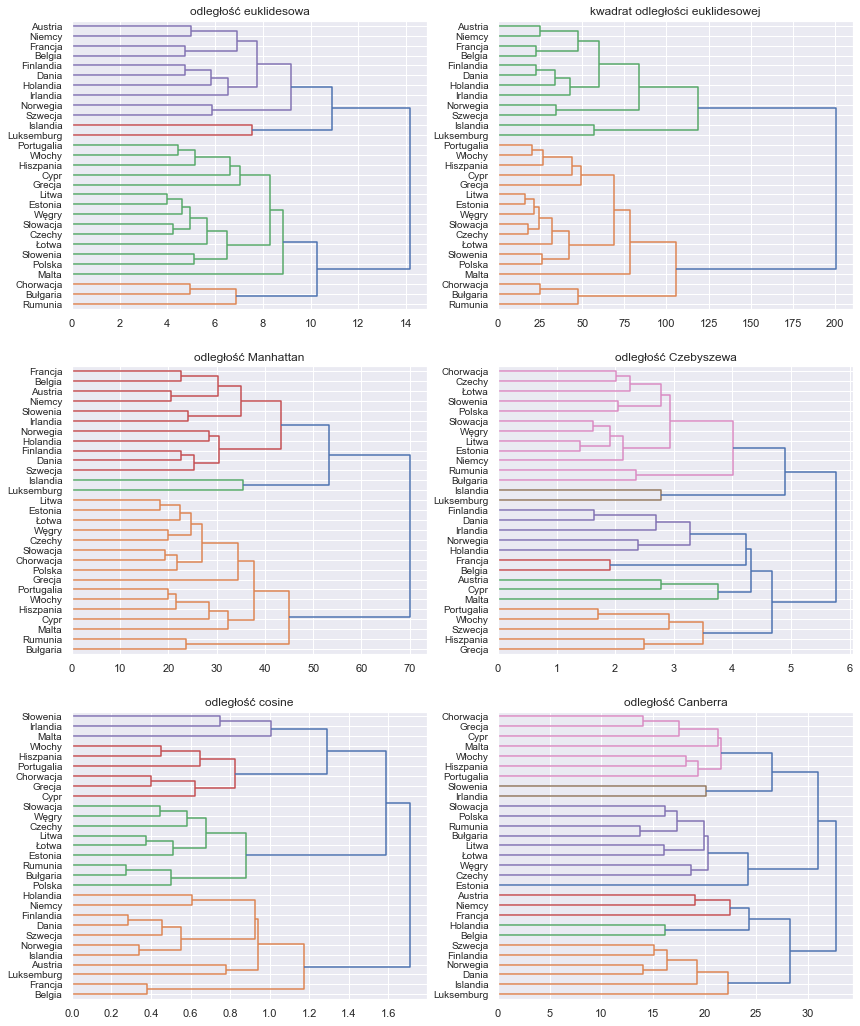

In [29]:
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
dend1 = shc.dendrogram(shc.linkage(df, method='complete',metric='euclidean'),ax=axes[0,0],orientation='right',labels=['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia',])
dend2 = shc.dendrogram(shc.linkage(df, method='complete',metric='sqeuclidean'),ax=axes[0,1], orientation='right',labels=['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia',])
dend3 = shc.dendrogram(shc.linkage(df, method='complete',metric='cityblock'),ax=axes[1,0], orientation='right',labels=['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia',])
dend4 = shc.dendrogram(shc.linkage(df, method='complete',metric='chebyshev'),ax=axes[1,1], orientation='right',labels=['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia',])
dend5 = shc.dendrogram(shc.linkage(df, method='complete',metric='cosine'),ax=axes[2,0], orientation='right',labels=['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia',])
dend6 = shc.dendrogram(shc.linkage(df, method='complete',metric='canberra'),ax=axes[2,1], orientation='right',labels=['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia',])
axes[0, 0].set_title('odległość euklidesowa')
axes[0, 1].set_title('kwadrat odległości euklidesowej')
axes[1, 0].set_title('odległość Manhattan')
axes[1, 1].set_title('odległość Czebyszewa')
axes[2, 0].set_title('odległość cosine')
axes[2, 1].set_title('odległość Canberra')
plt.show()

Dendogram metody środków ciężkości dla metryki euklidesowej

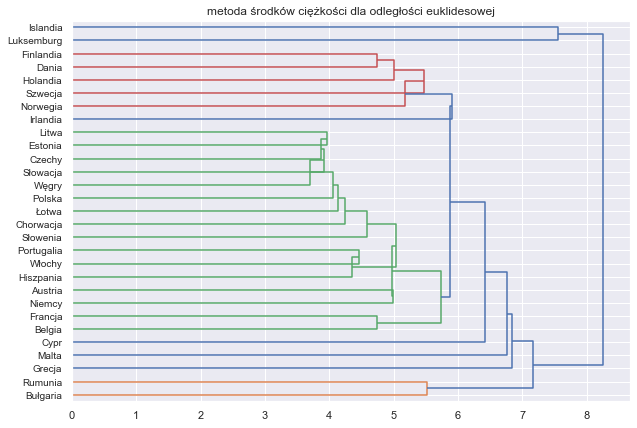

In [30]:
plt.figure(figsize=(10, 7))
plt.title("metoda środków ciężkości dla odległości euklidesowej")
dend1 = shc.dendrogram(shc.linkage(df, method='centroid',metric='euclidean'),distance_sort = True,orientation='right',labels=['Belgia','Bułgaria','Czechy','Dania','Niemcy','Estonia',
                                               'Irlandia','Grecja','Hiszpania','Francja','Chorwacja','Włochy',
                                               'Cypr','Łotwa','Litwa','Luksemburg','Węgry','Malta',
                                               'Holandia','Austria','Polska','Portugalia','Rumunia','Słowenia',
                                               'Słowacja','Finlandia','Szwecja','Islandia','Norwegia'])

### Tworzenie wykresów kołowych dla liczebności poszeczególnych skupień

Na tym etapie wyeliminowaliśmy wiele metod i metryk, których wyniki były niezadowalające

In [73]:
dane = pd.DataFrame()
dane['kraj'] = df_r['kraj']


Liczebność skupień metody pełengo wiązania dla metryki cosinus

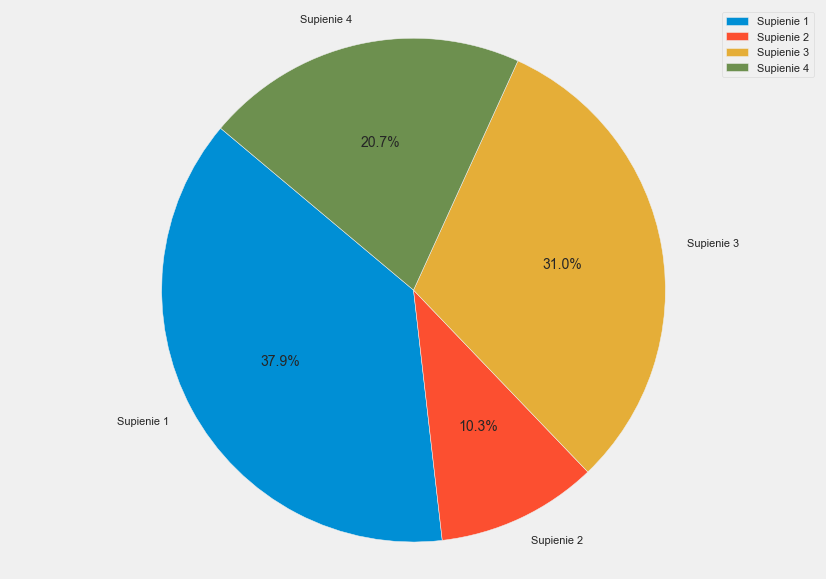

In [113]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='cosine', linkage='complete')
label = pd.DataFrame()
label['lab'] = cluster.fit_predict(df)
labels = label['lab'].unique()
sizes = (label.value_counts().sort_index()/label.value_counts().sum())*100
labels = ['Supienie 1','Supienie 2','Supienie 3','Supienie 4']

plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.legend(labels=labels)
plt.tight_layout()

plt.show()

Liczebności skupień dla metody Warda dla odległości euklidesowej

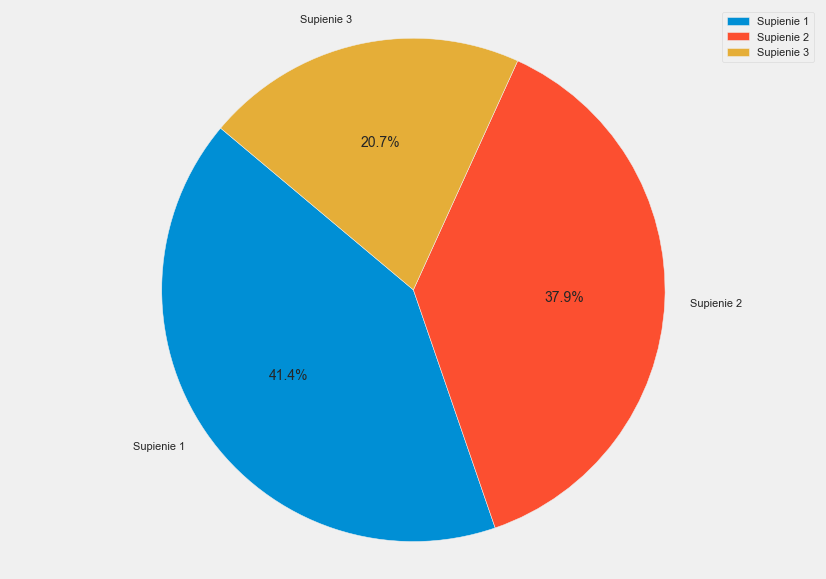

In [115]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
label = pd.DataFrame()
label['lab'] = cluster.fit_predict(df)
labels = label['lab'].unique()
sizes = (label.value_counts().sort_index()/label.value_counts().sum())*100
labels = ['Supienie 1','Supienie 2','Supienie 3']

plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.legend(labels=labels)
plt.tight_layout()

plt.show()

### Wykresy biegunowe dla wybranych metod

Wykres biegunowy dla metody Warda

In [119]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
label = cluster.fit_predict(df)

X =df_r.drop("kraj",axis=1)
clusters=pd.DataFrame(X,columns=df_r.drop("kraj",axis=1).columns)
clusters['label']= label

polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400,labels={"label": "Skupienie"})
fig.show()

c:\Users\kpetu\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\kpetu\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\kpetu\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Wykres biegunowy metody pełnego wiązania dla metryki cosinus

In [120]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='complete')
label = cluster.fit_predict(df)

X =df_r.drop("kraj",axis=1)
clusters=pd.DataFrame(X,columns=df_r.drop("kraj",axis=1).columns)
clusters['label']= label

polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400,labels={"label": "Skupienie"})
fig.show()

c:\Users\kpetu\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\kpetu\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\kpetu\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# Analiza skupień metodami iteracyjnymi

### Metoda k-średnich

In [121]:
from sklearn.cluster import KMeans

In [122]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
kmeans.labels_

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1])

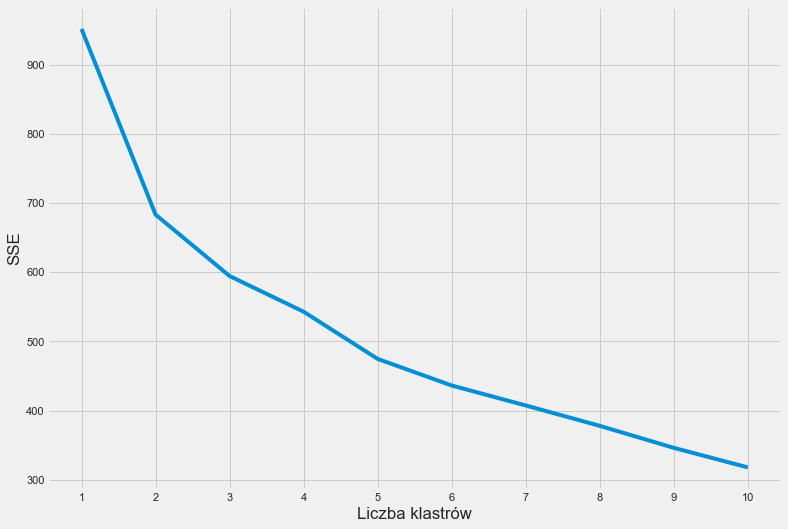

In [124]:
kmeans_kwargs = {
  "init": "random",
  "n_init": 10,
  "max_iter": 300,
  "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(df)
  sse.append(kmeans.inertia_)


plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Liczba klastrów")
plt.ylabel("SSE")
plt.show()


In [136]:
pie=clusters.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names=["Skupienie 1","Skupienie 2","Skupienie 3"],color=['blue','red','green'],height=400,width=400)


In [137]:
kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
X =df_r.drop("kraj",axis=1)
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=df_r.drop("kraj",axis=1).columns)
clusters['label']=kmeans.labels_

polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400, labels={"label": "Skupienie"})
fig.show()

c:\Users\kpetu\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\kpetu\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\kpetu\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



### Łączenie wyników analizy skupień i stworzonych wcześniej rankingów

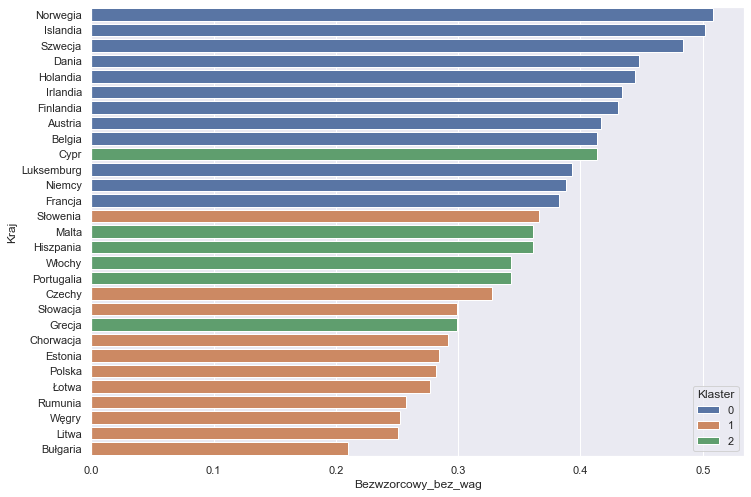

In [32]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
label = cluster.fit_predict(df)
dane["Klaster"] = label
dane.sort_values(by=["Bezwzorcowy_bez_wag"], inplace=True, ascending=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y="Kraj", x="Bezwzorcowy_bez_wag", hue="Klaster",dodge=False,data=dane);

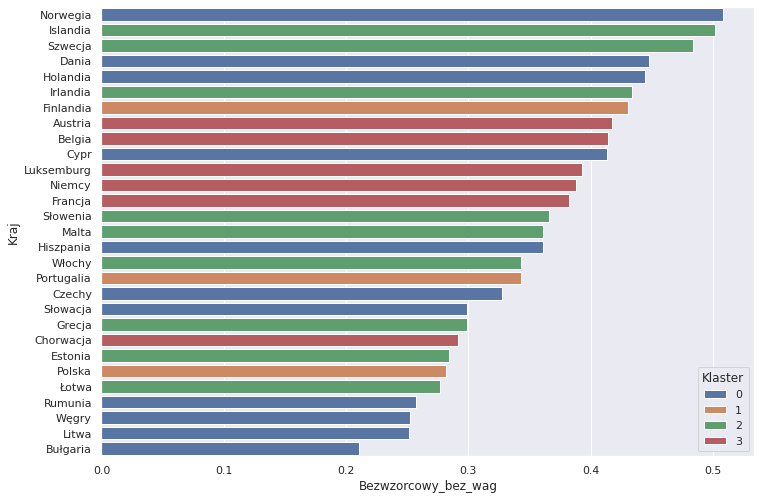

In [24]:


cluster3 = AgglomerativeClustering(n_clusters=4, affinity='cosine', linkage='complete')
label2 = cluster3.fit_predict(df)


dane["Klaster"] = label2

dane.sort_values(by=["Bezwzorcowy_bez_wag"], inplace=True, ascending=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y="Kraj", x="Bezwzorcowy_bez_wag", hue="Klaster",dodge=False,data=dane);

#Kmeans

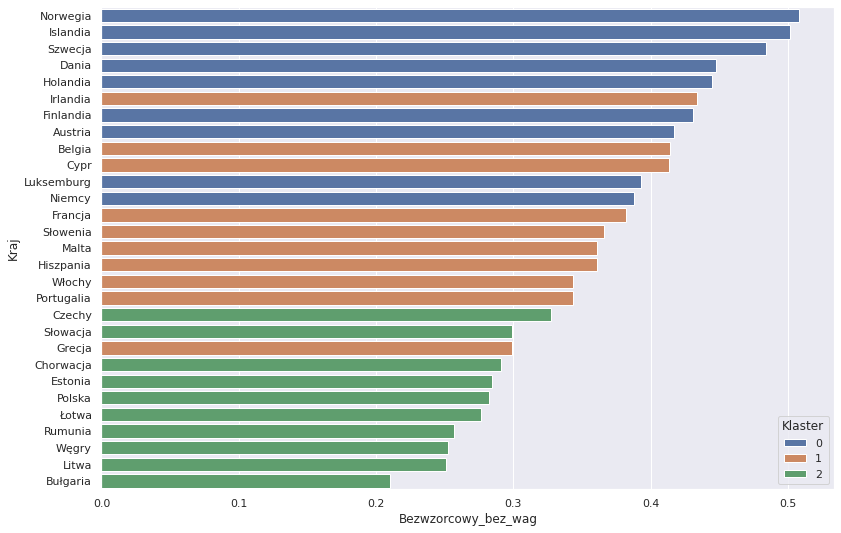

In [ ]:
dane["Klaster"] = clusters["label"]

dane.sort_values(by=["Bezwzorcowy_bez_wag"], inplace=True, ascending=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y="Kraj", x="Bezwzorcowy_bez_wag", hue="Klaster",dodge=False,data=dane);